In [5]:
# Install the dependencies 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

import seaborn as sns
import datetime as dt
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
from plotly import tools
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving all_stocks_5yr.csv to all_stocks_5yr.csv


In [6]:
# Store the data into a data frame
df = pd.read_csv('all_stocks_5yr.csv')
# Look at the first few elements
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [13]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [14]:
df = df.rename(columns={'Name': 'Ticks'})

In [17]:
google_df = df.loc[df['Ticks'] == 'GOOG']
google_df.head()

,date,open,high,low,close,volume,Ticks
251567,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
251568,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
251569,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
251570,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
251571,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [18]:
google_df.describe()

,open,high,low,close,volume
count,975.000000,975.000000,975.000000,975.000000,9.750000e+02
mean,725.364168,730.822248,719.456843,725.403353,1.808414e+06
std,165.996590,166.847404,165.526487,166.420529,9.479685e+05
min,494.650000,495.976000,487.560000,492.550000,7.932000e+03
25%,565.113000,570.380000,559.055000,564.785000,1.261927e+06
50%,722.710000,727.000000,716.430000,720.640000,1.576830e+06
75%,822.035000,826.185000,818.725000,823.330000,2.052652e+06
max,1177.330000,1186.890000,1171.980000,1175.840000,1.116494e+07


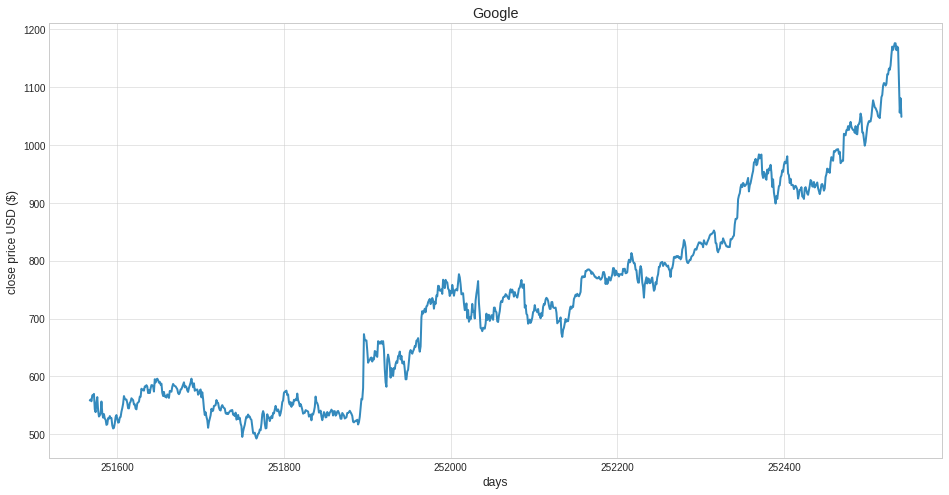

In [20]:
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('days')
plt.ylabel('close price USD ($)')
plt.plot(google_df['close'])

In [22]:
# Grabbing only the close price
google_df = google_df[['close']]
google_df.head()

,close
251567,558.46
251568,559.99
251569,556.97
251570,567.16
251571,567.00


In [24]:
# Create a variable to predict the '730' days out into the future. 
future_days = 365 # Prediction for the next two years starting from 2013

# Create a column for the target data which predicts values x days away from 
# the current price. 
google_df['Prediction'] = google_df[['close']].shift(-future_days)
google_df.head()

,close,Prediction
251567,558.46,614.66
251568,559.99,612.72
251569,556.97,621.35
251570,567.16,625.77
251571,567.00,623.24


In [26]:
# Create the feature data set (X) and convert it to a numpy array and remove the
# last x rows/days 
x = np.array(google_df.drop(['Prediction'], 1))[:-future_days]
print(x)

[[558.46  ]
 [559.99  ]
 [556.97  ]
 [567.16  ]
 [567.    ]
 [569.74  ]
 [543.14  ]
 [538.15  ]
 [554.9   ]
 [564.14  ]
 [540.95  ]
 [530.6   ]
 [532.52  ]
 [536.44  ]
 [556.54  ]
 [536.1   ]
 [528.62  ]
 [534.81  ]
 [526.94  ]
 [525.16  ]
 [516.18  ]
 [517.15  ]
 [527.7   ]
 [526.66  ]
 [531.35  ]
 [527.93  ]
 [527.81  ]
 [515.14  ]
 [509.96  ]
 [511.    ]
 [518.73  ]
 [529.92  ]
 [533.09  ]
 [526.65  ]
 [519.98  ]
 [520.63  ]
 [528.86  ]
 [529.77  ]
 [538.94  ]
 [545.06  ]
 [552.7   ]
 [565.95  ]
 [561.68  ]
 [560.08  ]
 [559.89  ]
 [553.93  ]
 [544.94  ]
 [544.66  ]
 [553.9   ]
 [556.33  ]
 [562.12  ]
 [560.55  ]
 [558.84  ]
 [551.35  ]
 [551.76  ]
 [544.28  ]
 [543.01  ]
 [553.37  ]
 [554.9   ]
 [556.36  ]
 [564.95  ]
 [564.62  ]
 [578.65  ]
 [576.    ]
 [577.24  ]
 [575.28  ]
 [582.67  ]
 [582.335 ]
 [584.73  ]
 [582.25  ]
 [571.09  ]
 [576.08  ]
 [571.1   ]
 [579.18  ]
 [584.87  ]
 [584.78  ]
 [582.66  ]
 [573.7299]
 [595.08  ]
 [589.47  ]
 [594.74  ]
 [595.98  ]
 [593.35  ]
 [58

In [27]:
# Create the target data set (y) and convert it to a numpy array and get all
# of the target values except the last (x).
y = np.array(google_df['Prediction'])[:-future_days]
print(y)

[ 614.66   612.72   621.35   625.77   623.24   635.14   635.98   642.9
  629.25   635.44   622.69   622.36   625.8    611.97   594.89   594.97
  608.42   611.29   626.91   641.47   645.44   642.36   639.16   643.61
  646.67   652.3    651.16   661.74   662.2    666.1    650.28   642.61
  651.79   702.     712.78   708.49   712.95   716.92   710.81   721.11
  722.16   728.11   731.25   733.76   724.89   728.32   735.4    731.23
  717.     728.96   725.3    740.     738.41   756.6    755.98   748.28
  748.15   750.26   742.6    767.04   762.38   752.54   766.81   763.25
  762.37   751.61   749.46   738.87   747.77   743.4    758.09   749.43
  739.31   747.77   750.     750.31   748.4    762.51   776.6    771.
  758.88   741.84   742.58   743.62   726.39   714.47   716.03   726.07
  700.56   714.72   694.45   701.79   698.45   706.59   725.25   711.67
  713.04   699.99   730.96   742.95   752.     764.65   726.95   708.01
  683.57   682.74   678.11   684.12   683.11   682.4    691.     70

In [28]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [29]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [31]:
# Get the last 'x' rows of the feature data set
x_future = google_df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future 

array([[559.5  ],
       [557.99 ],
       [560.36 ],
       [558.81 ],
       [570.19 ],
       [558.785],
       [555.17 ],
       [548.34 ],
       [552.03 ],
       [548.   ],
       [542.56 ],
       [535.53 ],
       [536.765],
       [537.02 ],
       [541.61 ],
       [540.78 ],
       [540.01 ],
       [539.17 ],
       [530.39 ],
       [532.53 ],
       [533.8  ],
       [524.05 ],
       [535.38 ],
       [533.97 ],
       [539.365],
       [547.   ],
       [565.06 ],
       [555.37 ],
       [553.68 ],
       [549.08 ],
       [537.34 ],
       [537.9  ],
       [540.78 ],
       [530.8  ],
       [524.22 ],
       [530.7  ],
       [538.22 ],
       [535.7  ],
       [529.04 ],
       [529.62 ],
       [538.4  ],
       [533.85 ],
       [532.3  ],
       [537.36 ],
       [539.27 ],
       [542.51 ],
       [540.11 ],
       [532.32 ],
       [539.79 ],
       [539.78 ],
       [532.11 ],
       [533.99 ],
       [539.18 ],
       [540.31 ],
       [536.7  ],
       [53

In [32]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show the linear regression model prediction
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[ 724.89   772.15   769.09   738.41   768.78   738.41   780.08   780.35
  775.32   759.66   769.02   759.69   768.24   771.76   768.88   786.14
  771.41   776.22   718.36   786.9    710.83   783.01   759.69   790.51
  785.31   772.56   776.43   781.76   776.86   775.08   785.94   750.5
  786.14   778.19   778.53   779.96   795.26   759.69   796.97   799.37
  813.11   807.67   768.7    785.94   785.31   784.54   771.41   768.7
  750.585  750.585  768.7    790.51   785.31   762.56   754.02   704.24
  758.49   764.48   771.23   760.54   769.2    768.27   725.27   719.85
  768.24   771.23   795.26   747.92   750.5    692.36   759.11   789.29
  776.42   789.29   733.78   733.78   716.55   797.85   790.8    794.2
  796.42   794.56   733.76   697.77   791.55   831.5    831.5    771.82
  786.14   786.9    794.02   806.15   806.65   804.79   831.33   806.36
  807.88   804.61   806.07   802.175  805.02   819.31   823.87   802.32
  832.15   823.31   802.32   796.79   795.695  831.66   801.49   80

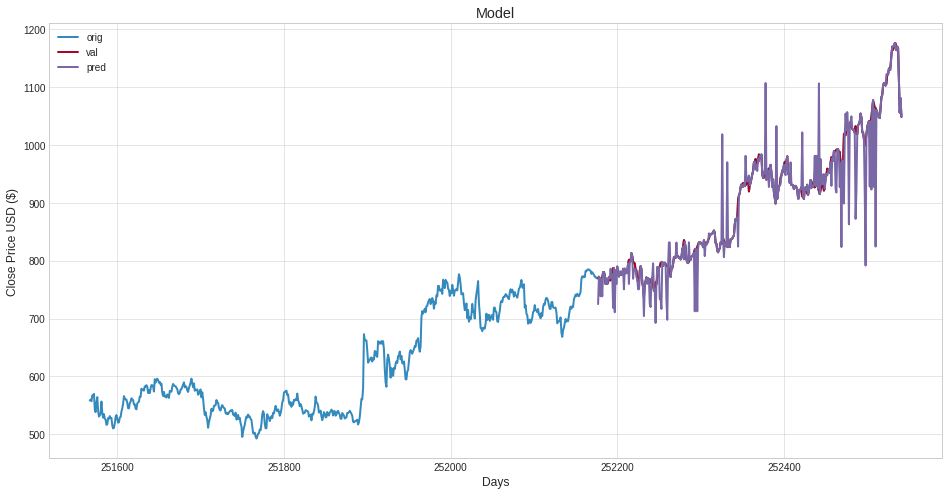

In [36]:
# Visualize the data
predictions = tree_prediction

valid = google_df[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(google_df['close'])
plt.plot(valid[['close', 'Prediction']])
plt.legend(['orig', 'val', 'pred'])
plt.show()

As we can see in the purple prediction line, when we use the **decision tree classifier**, we have a more accurate prediction to the actual value. The Google stock thus grows on a yearly basis. 

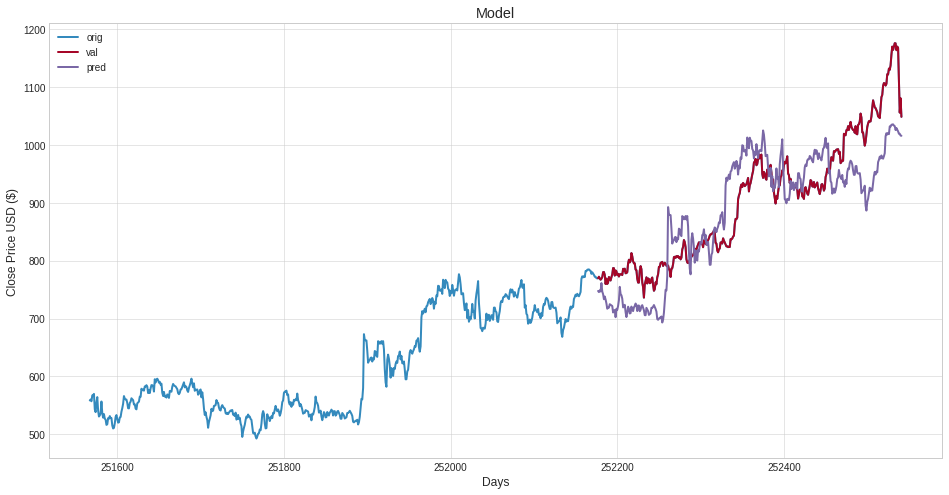

In [35]:
# Visualize the data
predictions = lr_prediction

valid = google_df[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(google_df['close'])
plt.plot(valid[['close', 'Prediction']])
plt.legend(['orig', 'val', 'pred'])
plt.show()

On the other hand, with the **linear classifier**, we see that the prediction is dips downward and rises upward as and moves adjacent to the red line. This indicates that the prediction is lower than the actual expected rise of the Google stock value and that the prediction is also higher than the actual expected dip in Google's stock value. 